In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## a) load/merge data and visualize logerror

In [2]:
# load data into DataFrames
train=pd.read_csv("p1_data/train.csv")
properties=pd.read_csv("p1_data/properties.csv")
df=pd.merge(properties,train,on='id')
df.head()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015,76724.0,2015.06,NaN,NaN,6.111000e+13,0.0953,1/27/16
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015,95870.0,2581.30,NaN,NaN,6.111000e+13,0.0198,3/30/16
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015,14234.0,591.64,NaN,NaN,6.111000e+13,0.0060,5/27/16
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015,17305.0,682.78,NaN,NaN,6.111000e+13,-0.0566,6/7/16
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015,277000.0,5886.92,NaN,NaN,6.111000e+13,0.0573,8/8/16


In [3]:
# eliminate outliers
max_out=np.percentile(df.logerror,99)
min_out=np.percentile(df.logerror,1)
df.loc[df.logerror>max_out, 'logerror'] = max_out
df.loc[df.logerror<min_out, 'logerror'] = min_out
df.head()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015,76724.0,2015.06,NaN,NaN,6.111000e+13,0.0953,1/27/16
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015,95870.0,2581.30,NaN,NaN,6.111000e+13,0.0198,3/30/16
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015,14234.0,591.64,NaN,NaN,6.111000e+13,0.0060,5/27/16
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015,17305.0,682.78,NaN,NaN,6.111000e+13,-0.0566,6/7/16
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015,277000.0,5886.92,NaN,NaN,6.111000e+13,0.0573,8/8/16


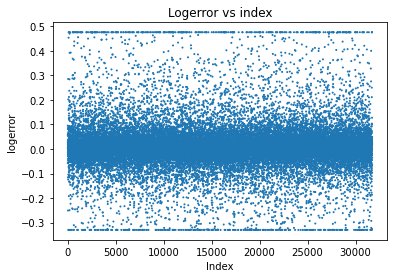

In [4]:
# scatter of logerr
import matplotlib.pyplot as plt
index=[i for i in range(len(df))]
sizes=np.ones(len(index))
plt.scatter(index,df.logerror,sizes)
plt.xlabel('Index')
plt.ylabel('logerror')
plt.title("Logerror vs index");

(-0.3299, 0.47576799999999714)

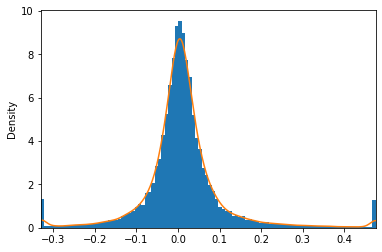

In [5]:
# histogram of logerr
df.logerror.hist(bins=100,density=True)
df.logerror.plot.kde()
plt.xlim([min_out,max_out])

## b) data cleaning

In [6]:
df_new=pd.DataFrame(df.isnull().sum())
df_new.columns= ["Missing_Count"]
df_new.rename(index={0:'Columns'})
df_new.index.names = ['Columns']
df_new

,Missing_Count
Columns,
id,0
airconditioningtypeid,21563
architecturalstyletypeid,31628
basementsqft,31711
bathroomcnt,0
bedroomcnt,0
buildingclasstypeid,31717
buildingqualitytypeid,11488
calculatedbathnbr,414


In [7]:
# build new data frame
Data_cleaner=pd.DataFrame()
Data_cleaner["Headers"]=df.columns
missing_data=[]
for i in df.columns:
    missing_data.append(df[i].isna().sum())
Data_cleaner["Missing_Count"]=missing_data
Data_cleaner

,Headers,Missing_Count
0,id,0
1,airconditioningtypeid,21563
2,architecturalstyletypeid,31628
3,basementsqft,31711
4,bathroomcnt,0
5,bedroomcnt,0
6,buildingclasstypeid,31717
7,buildingqualitytypeid,11488
8,calculatedbathnbr,414
9,decktypeid,31502


In [8]:
Data_cleaner["Missing_ratio"]=Data_cleaner["Missing_Count"]/len(df)
Data_cleaner

,Headers,Missing_Count,Missing_ratio
0,id,0,0.000000
1,airconditioningtypeid,21563,0.679685
2,architecturalstyletypeid,31628,0.996942
3,basementsqft,31711,0.999559
4,bathroomcnt,0,0.000000
5,bedroomcnt,0,0.000000
6,buildingclasstypeid,31717,0.999748
7,buildingqualitytypeid,11488,0.362112
8,calculatedbathnbr,414,0.013050
9,decktypeid,31502,0.992971


In [9]:
# fill missing data
non_str_cols=[]
for i in range(len(df.columns)):
    if df[df.columns[i]].dtype!=object:
        non_str_cols.append(df.columns[i])
for i in non_str_cols:
    mean_value=df[i].mean()
    df[i].fillna(value=mean_value,inplace=True)
df.head()

,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,1.809683,7.453608,670.571429,2.5,3.0,4.0,5.570193,2.5,66.0,...,115087.0,191811.0,2015,76724.0,2015.06,NaN,13.314845,6.111000e+13,0.0953,1/27/16
1,17088994,1.809683,7.453608,670.571429,1.0,2.0,4.0,5.570193,1.0,66.0,...,143809.0,239679.0,2015,95870.0,2581.30,NaN,13.314845,6.111000e+13,0.0198,3/30/16
2,17100444,1.809683,7.453608,670.571429,2.0,3.0,4.0,5.570193,2.0,66.0,...,33619.0,47853.0,2015,14234.0,591.64,NaN,13.314845,6.111000e+13,0.0060,5/27/16
3,17102429,1.809683,7.453608,670.571429,1.5,2.0,4.0,5.570193,1.5,66.0,...,45609.0,62914.0,2015,17305.0,682.78,NaN,13.314845,6.111000e+13,-0.0566,6/7/16
4,17109604,1.809683,7.453608,670.571429,2.5,4.0,4.0,5.570193,2.5,66.0,...,277000.0,554000.0,2015,277000.0,5886.92,NaN,13.314845,6.111000e+13,0.0573,8/8/16


## c) univariate analysis

C:\Users\javal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


<BarContainer object of 53 artists>

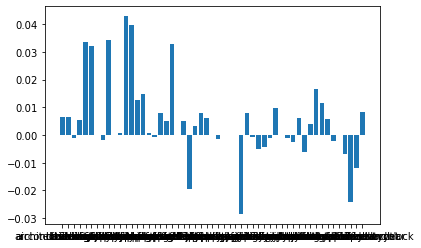

In [10]:
import matplotlib.pyplot as plt
from scipy import stats

corr_coeff=[]
col_name=[]
sort_corr=[]
for i in non_str_cols:
    if i!="logerror":
        coeff=stats.pearsonr(df[i], df['logerror'])
        col_name.append(i)
        corr_coeff.append(coeff[0])
plt.bar(col_name,corr_coeff)

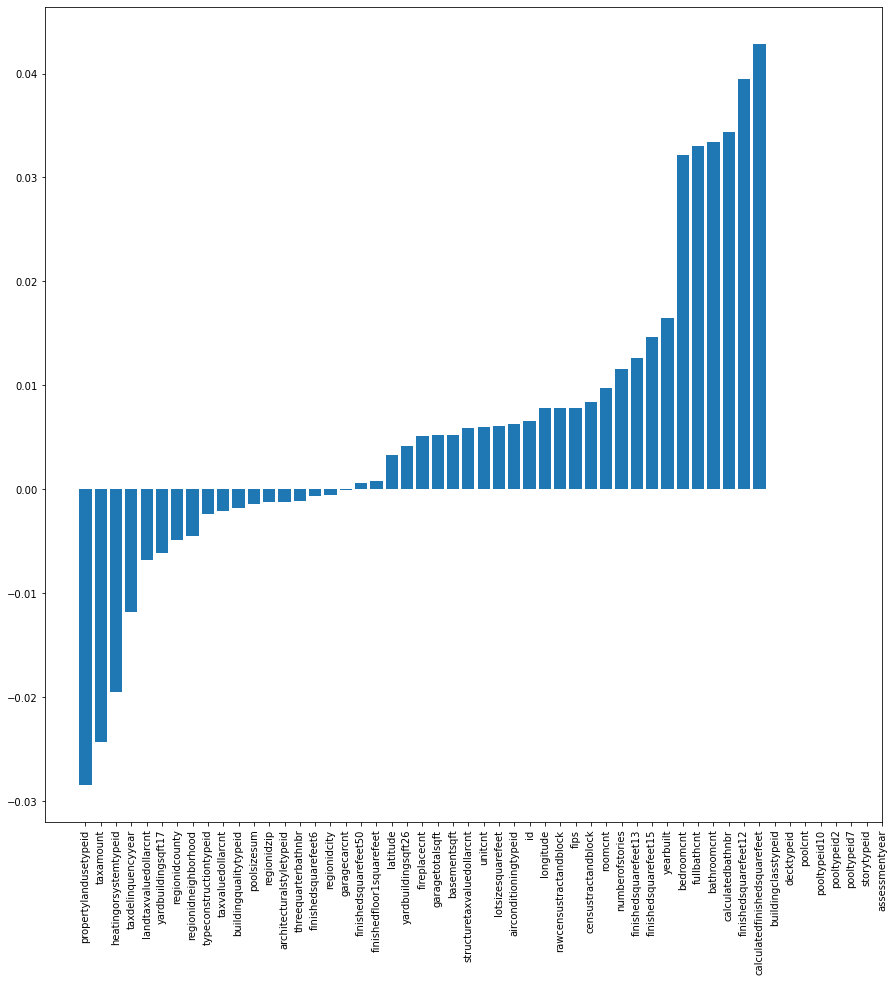

In [11]:
sorting_corr=pd.DataFrame(list(zip(non_str_cols[:-1],corr_coeff)))
sorting_corr.columns=['Headers','Corr_coeff']
sorting_corr.head()
plt.figure(figsize=(15,15))
sorted_corr=sorting_corr.sort_values(by=['Corr_coeff'])
plt.bar(sorted_corr['Headers'],sorted_corr["Corr_coeff"])
plt.xticks(sorted_corr["Headers"], rotation='vertical');

In [12]:
# explain reason


## d) non-linear regression model

In [13]:
df.columns

Index(['id', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft2

In [14]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"

df_ml=df.drop(["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag","id","transactiondate"],axis=1)

In [15]:
# split and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ml[df_ml.columns[:-1]],df_ml[df_ml.columns[-1]], test_size=0.3, random_state=42)

In [16]:
X_train=(X_train[X_train.columns]-X_train[X_train.columns].mean())/(X_train[X_train.columns].std())
X_test=(X_test[X_test.columns]-X_test[X_test.columns].mean())/(X_test[X_test.columns].std())

In [17]:
X_train_ml=np.array(X_train.dropna(axis=1))
X_test_ml=np.array(X_test.dropna(axis=1))
y_train=np.array(y_train)
y_train=y_train.astype('int')

In [18]:
# report importances and mse
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train_ml, y_train)

MLPClassifier()

In [19]:
predicted_y = clf.predict(X_test_ml)

In [20]:
from sklearn.metrics import mean_squared_error
print(f'The MSE is  {mean_squared_error(y_test, predicted_y)}')

The MSE is  0.010689800254433255
